<a href="https://colab.research.google.com/github/Giovannisb/Portfolio_data_science/blob/master/Detec%C3%A7%C3%A3o_de_fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de fraudes em cartões de crédito

<center><img src='https://image.freepik.com/fotos-gratis/cartoes-de-credito_144627-16725.jpg'></center>

Sucessor do dinheiro em espécie, os cartões de crédito se tornaram os queridinhos das pessoas. Fácil de guardar na carteira, você evitava de levar quantias de dinheiro em espécie, com isso, ganhava um pouco de segurança pois, caso você fosse assaltado ou coisa do tipo, é só fazer uma ligação para o banco e bloquea-lo. 

Além da facilidade de transporte, também veio a facilidade para gastar, como é mais fácil passar um cartão na maquineta, o consumismo desenfreado cresceu bastante nas ultimas décadas. Todos os dias, todas as horas são feitas transações efetuadas por cartões de crédito e os criminosos de alguma forma, tentam fraudar essas transações.

<center><img src='https://image.freepik.com/vetores-gratis/cartoes-de-credito-de-hackers-de-personagens_23-2148537999.jpg'></center>

Com o advento de avanço nos estudos de data science e da tecnologia, a área de machine learning está presente no combate a esse tipo de crime. Bancos e emissoras de cartões, se ultilizam do `machine learning` para identificar de forma mais fácil e rápido, se determinada transação é fraudulenta ou não.

Nesta análise, vou abordar alguns conceitos introdutórios ao machine learning.

##Importando dados

No site do `Kaggle`, uma das maiores plataformas de datasets abertos hoje, irei utilizar um dataset de fraudes de cartões de crédito na Europa.

Como de costume, inicio importando algumas bibliotecas para facilitar minha análise, como o `Pandas`, `Matplotlib` e `Seaborn`.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como podemos observar nas cinco primeiras entradas do DataFrame, a maioria dos dados estão salvos de forma para que não exponha nenhum tipo de dado para identificar a transação. Apenas as colunas de `Time`, `Amount` e `Class` que podemos identificar não estando criptografadas as informações. E uma coisa muito interessante e boa para quem analisa os dados, não existe valor nulo em todo DAtaFrame.

A coluna `Class` é o nosso indicador se a transação é fraudulenta ou não, o gráfico a seguir, identificamos a proporções de cada classificação. Como podemos observar, de mais de 284 mil transações, apenas 492 são identificadas como fraudes, representando apenas 0.17% do DataFrame, isso nos mostra o quão desbalanceado ele está.

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



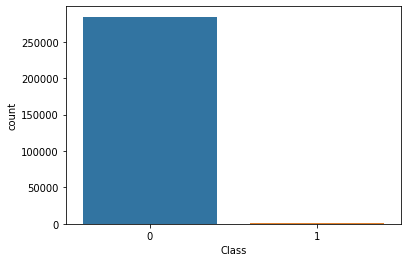

In [4]:
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

sns.countplot('Class', data=df);

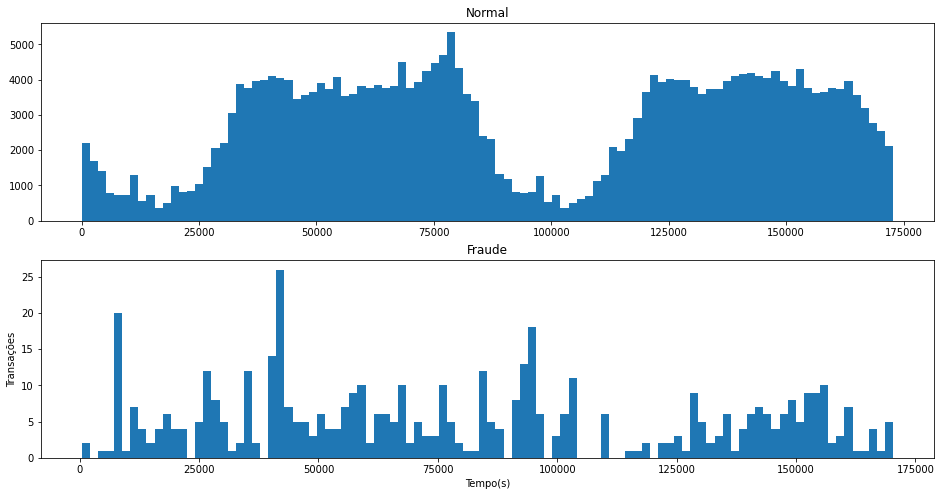

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))

ax[0].hist(df.Time[df.Class == 0], bins=100)
ax[0].set_title("Normal")

ax[1].hist(df.Time[df.Class == 1], bins=100)
ax[1].set_title("Fraude")

plt.xlabel("Tempo(s)")
plt.ylabel("Transações")

plt.show()

Para visualizarmos melhor esses dados, plotei dois histogramas para podermos ter a visão de tempo x transações, quantas transações são fraudulentas ou não, em um determinado tempo. E como podemos ver, o maior valor de transações fraudulentas em 1 segundo, não chegou a 30 transações.

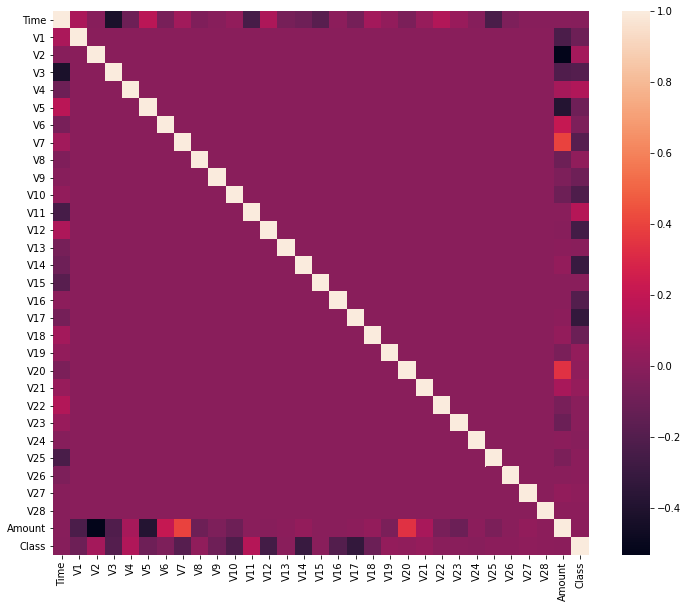

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr());

Com o `heatmap` ou `mapa de calor`, nós analisamos a correlação das variáveis. Podemos identificar, por exemplo, que a coluna `Amount` tem uma correlação mais forte com a coluna `V7` e `V20`. E a coluna `Class` com a coluna `V11`. Como não temos ideia do que representam esses dados das colunas `V1` até a `V28`, não podemos afirmar como ocorre essa correlação.

<center><img src='https://image.freepik.com/vetores-gratis/conjunto-de-robo-bonito-ai-personagem-analisar-e-observar-a-acao_99413-151.jpg'></center>

#Modelo de machine learning

##Afinal, o que é machine learning?

Machine learning ou aprendizado de máquinas é um subcampoda ciência da computação que evoluiu dos estudos de reconhecimento de padrões e aprendizado computacional em inteligência artificial. Machine learning explora o estudo e construção de algoritmos que podem aprender de seus erros e fazer previsões sobre dados. Tais algoritmos operam construindo um modelo a partir de inputs amostrais a fim de fazer previsões ou decisões guiadas pelos dados ao invés de simplesmente seguindo inflexíveis e estáticas instruções programadas.

Para essa parte da análise dos dados, irei utilizar uma biblioteca chamada `scikit-learn`, que nos ajuda a criar, treinar e testar os modelos de predição dos dados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

Irei criar um modelo de classificação chamado `logistc regression`. Como procedimento de boa prática, deveriamos balancear e normalizar os dados, mas antes, vou executar o modelo sem esses procedimentos para comparar-mos as diferenças.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


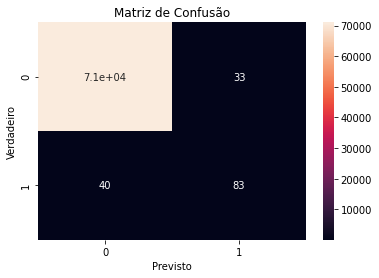

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9995    0.9995     71079
           1     0.7155    0.6748    0.6946       123

    accuracy                         0.9990     71202
   macro avg     0.8575    0.8372    0.8470     71202
weighted avg     0.9989    0.9990    0.9990     71202

Acurácia: 0.9990

AUC: 0.8372



In [8]:
#Treino e teste desbalanceado
X = df.drop('Class', axis=1)
y = df['Class']
 
# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)
 
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)
 
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
 
# plotar a matrix de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Observamos uma acurácia altíssima, de 99.88% porem, quando comparado com o AUC, há uma diferença de quase 20%. AUC é a probabilidade de que um exemplo positivo aleatório seja pontuado acima de um exemplo negativo aleatório. 

Para corrigirmos isso, precisamos balancear os dados. Para isso, utilizei a técnica de under-sampling, que consiste em  reduzir o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências.

Observando o `heatmap`, podemos ver que temos bastante falso-negativos e queremos o menor número disso, então, iremos balancear nossos dados.

1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


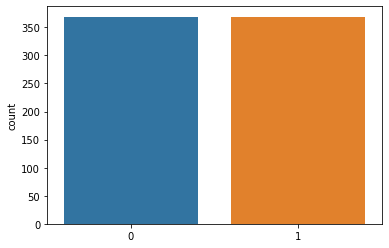

In [9]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res);

Agora temos nossos dados balanceados. Vamos treinar de novo o modelo com os dados balanceados e vamos ver o resultado.

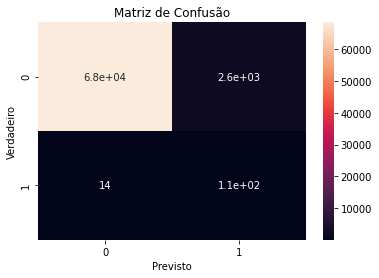

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9632    0.9811     71079
           1     0.0400    0.8862    0.0765       123

    accuracy                         0.9630     71202
   macro avg     0.5199    0.9247    0.5288     71202
weighted avg     0.9981    0.9630    0.9796     71202

Acurácia: 0.9630

AUC: 0.9247



In [10]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()

#Padronizando os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_res), annot=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

Observamos que a acurácia diminuiu para 96%, mas o AUC aumentou para 92%, uma diferença de apenas 4% e podemos ver que os falsos-negativos diminuiram.

Agora vamos normalizar nossos dados.

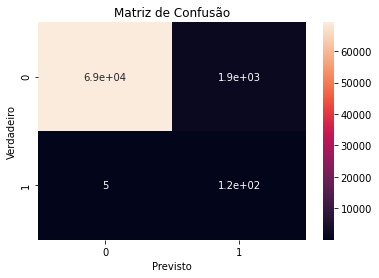

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9728    0.9862     71079
           1     0.0574    0.9593    0.1084       123

    accuracy                         0.9727     71202
   macro avg     0.5287    0.9661    0.5473     71202
weighted avg     0.9983    0.9727    0.9846     71202

Acurácia: 0.9727

AUC: 0.9661



In [12]:
#instanciando modelo
model = LogisticRegression()

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)
 
#Padronizando os dados de treino
scaler = StandardScaler().fit(X_res)
X_train = scaler.transform(X_res)

# treinando o modelo de Regressão Logística
model.fit(X_train, y_res)
 
# fazer as previsões em cima dos dados de teste
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# plotar a matrix de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax);

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()
 
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Com os dados normalizados e balanceados, podemos ver que a acurácia chegou a 97% e o AUC em 96%. Quanto mais próximos eles estiverem, mais preciso é o nosso modelo de predição dos dados. Podemos observar no heatmap o baixo número de falsos-negativos.

#Conclusão

Devemos ter bastante cuidado com os dados quando estamos desenvolvendo um modelo de machine learning, principalmente no balanceamento e na normalização. O índe AUC que usamos, é bastante utilizado nas principais competições, como as do Kaggle por exemplo. Apenas a acurácia não avalia se o seu modelo é bom ou não pois, uma alta acurácia pode significar um overfitting(quando o modelo é muito bom nos dados de treino mais não consegue classificar corretamente os dados de teste. Quanto mais próximo o valor da acurácia estiver do AUC, melhor é o nosso modelo e podemos ver isso nos três modelos que treinamos.